In [43]:
import numpy as np
import pandas as pd
import sys
import json
import os
import copy
import matplotlib.pyplot as plt
import scipy
import multiprocessing
import h5py
import corner
import dynesty

Load save:

In [124]:
dsampler = dynesty.DynamicNestedSampler.restore('dynesty_saves/2013_02_15_restricted_heights.save')
results = dsampler.results
samples = results.samples
ndim = len(samples.T)

Summary:

In [125]:
results.summary()

Summary
niter: 14680
ncall: 2122215
eff(%):  0.692
logz: -48024.894 +/-  0.265


In [126]:
# directory = './dynesty_saves'
# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)
#     if os.path.isfile(f):
#         dsamp = dynesty.DynamicNestedSampler.restore(f)
#         print(filename, dsamp.results.samples_n)

In [127]:
samples[-1]

array([9.07693326e+07, 2.51294675e+00, 1.07236644e+01, 3.85797465e+01,
       9.98558707e+01, 7.19857992e+01, 5.93041670e-06, 2.76057265e-06,
       3.12601014e-06, 2.79351647e-06, 7.67932009e-01, 6.29648361e-01,
       6.30602119e-01, 1.06857924e+00, 1.09792930e+00, 3.03861117e+01,
       7.50074417e+00, 1.87684627e+01, 3.25791101e+01, 6.15261294e+01,
       4.30483560e+04, 3.67932218e+04, 3.45886150e+04, 3.21825828e+04,
       2.56756019e+04])

In [128]:
print(dsampler.cite)

Code and Methods:
Speagle (2020): ui.adsabs.harvard.edu/abs/2020MNRAS.493.3132S
Koposov et al. (2023): doi.org/10.5281/zenodo.3348367

Nested Sampling:
Skilling (2004): ui.adsabs.harvard.edu/abs/2004AIPC..735..395S
Skilling (2006): projecteuclid.org/euclid.ba/1340370944
Dynamic Nested Sampling:
Higson et al. (2019): doi.org/10.1007/s11222-018-9844-0

Bounding Method:
Feroz, Hobson & Bridges (2009): ui.adsabs.harvard.edu/abs/2009MNRAS.398.1601F

Sampling Method:
Neal (2003):: projecteuclid.org/euclid.aos/1056562461
Handley, Hobson & Lasenby (2015a): ui.adsabs.harvard.edu/abs/2015MNRAS.450L..61H
Handley, Hobson & Lasenby (2015b): ui.adsabs.harvard.edu/abs/2015MNRAS.453.4384H



Samples:

Text(0, 0.5, 'mass')

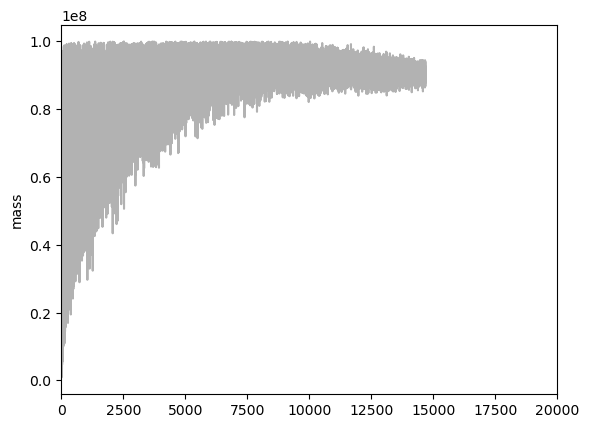

In [129]:
plt.plot(samples[:, 0], 'k', alpha=0.3)
plt.xlim(0, 20000)
plt.ylabel('mass')

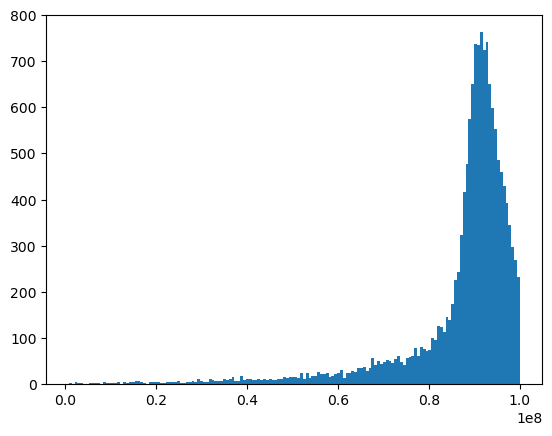

In [130]:
plt.hist(samples[:, 0].flatten(), bins='auto')
plt.show()

dyplots:

/home/ichow9/.conda/envs/wmpl/lib/python3.10/site-packages/dynesty/plotting.py:318: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


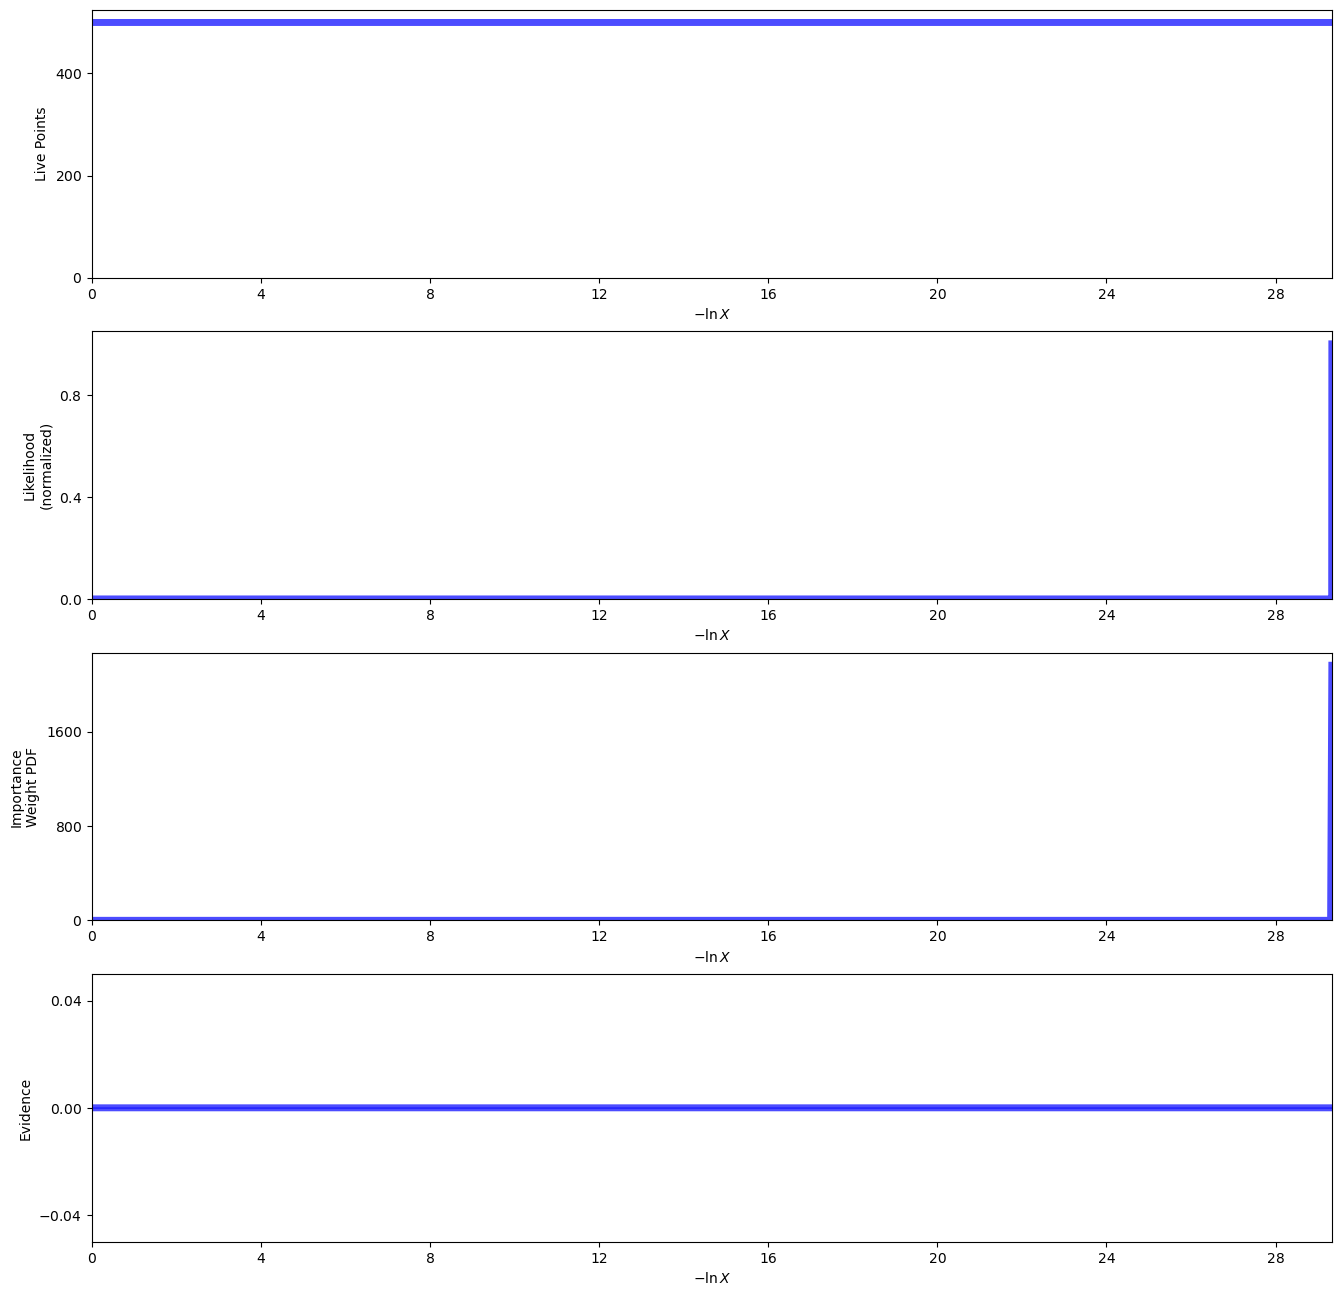

In [131]:
from dynesty import plotting as dyplot
fig, axes = dyplot.runplot(results)#, lnz_truth=lnz_truth)  # summary (run) plot

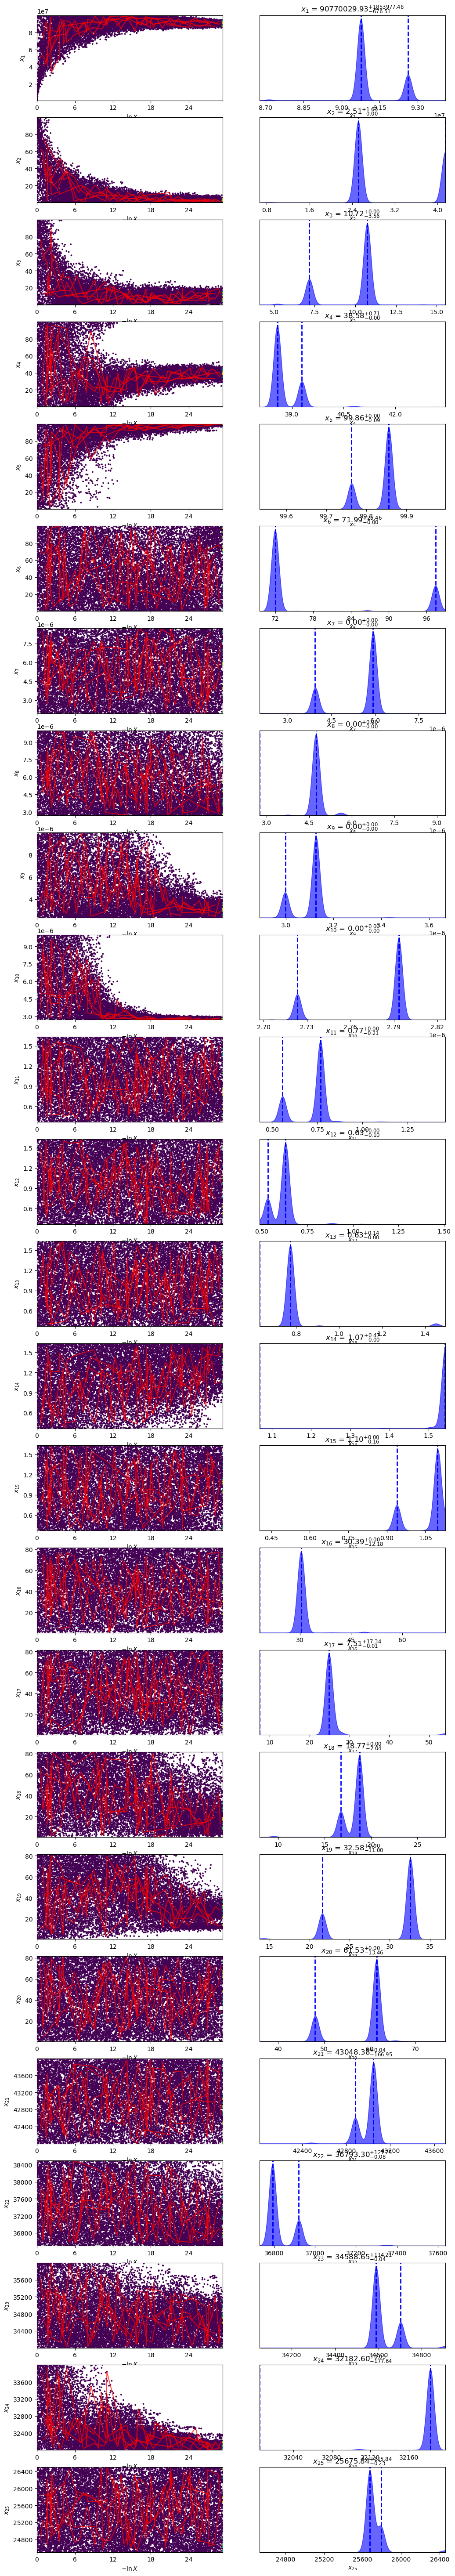

In [132]:
fig, axes = dyplot.traceplot(results, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5))

In [133]:
# fg, ax = dyplot.cornerplot(results, color='dodgerblue', truths=np.zeros(ndim),
#                            truth_color='black', show_titles=True,
#                            quantiles=None, max_n_ticks=3)

In [134]:
print(dsampler.cite)

Code and Methods:
Speagle (2020): ui.adsabs.harvard.edu/abs/2020MNRAS.493.3132S
Koposov et al. (2023): doi.org/10.5281/zenodo.3348367

Nested Sampling:
Skilling (2004): ui.adsabs.harvard.edu/abs/2004AIPC..735..395S
Skilling (2006): projecteuclid.org/euclid.ba/1340370944
Dynamic Nested Sampling:
Higson et al. (2019): doi.org/10.1007/s11222-018-9844-0

Bounding Method:
Feroz, Hobson & Bridges (2009): ui.adsabs.harvard.edu/abs/2009MNRAS.398.1601F

Sampling Method:
Neal (2003):: projecteuclid.org/euclid.aos/1056562461
Handley, Hobson & Lasenby (2015a): ui.adsabs.harvard.edu/abs/2015MNRAS.450L..61H
Handley, Hobson & Lasenby (2015b): ui.adsabs.harvard.edu/abs/2015MNRAS.453.4384H

